# Objective

Text and image data are available in large volumes over internet. Many times this data is not labelled. Our aim is to create a mapping between this non labelled data in form of a Knowledge graph. And caption images using textual data around them.

In [171]:
# Loading Libraries

import re
import pandas
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize 
from nltk import FreqDist
fdist = FreqDist
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd 
import re
from io import StringIO
import os
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
from pathlib import Path
import pandas as df

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Textual Data Overview

In [176]:
# Loading text files from directory

my_dir_path = r"C:\Users\Lenovo\Desktop\final_text1"
results = defaultdict(list)
name=[]
for file in Path(my_dir_path).iterdir():
    with open(file, encoding="utf8") as file_open:
        results["text"].append(file_open.read())
for file in Path(my_dir_path).iterdir():
        name.append(file.name)
        
# Creating pandas dataframe

df = pd.DataFrame(results)
print(df)

# Creating copy of dataframe

s=df.copy(deep=True)
t=df.copy(deep=True)


                                                 text
0   Clustering for Classification.\nLike PCA clust...
1   Basics of Clustering,\nLike PCA Clustering ope...
2   Transformation of the Coordinate System.\nWith...
3   Data Preprocessing.\nComplex tasks in signal p...
4   Dimension Reduction by PCA.\nThe PCA transform...
..                                                ...
61  Observations.\nAll time signals are chosen ide...
62  Observations.\nFor the DFT result converges to...
63  Stationary Signals.\nSignals that do not chang...
64  Short-Time Discrete Fourier Transform STDFT\nW...
65  Summary Rectangular Window.\nEvery finite real...

[66 rows x 1 columns]


In [177]:
# length of dataframe df

a=len(df['text'])
print('Number of text rows=',a)

Number of text rows= 66


In [178]:

# checking null data points

df.info()

# sample data point
print('*'*50)
print((df.iloc[23,0]))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 1 columns):
text    66 non-null object
dtypes: object(1)
memory usage: 656.0+ bytes
**************************************************
For measurement of accelerations the following two approaches are important. The derivative of speed signals. Measurement of the force or torque at a body with mass or moment of inertia and determination of acceleration via.
The first approach leads to the two previous sections. Therefore only the second approach is pursued here. Hereby the inertia of a mechanical resonator acts on a seismic mass. The
equations of motion are those of a standard spring-damper-mass system Measurement of Acceleration with a Seismic Mass
With the usual notations for the damping D and the resonance frequency, a seismic mass
follows the equation. If is chosen to be big via a stiff spring and a small mass then the term dominates the left part of this equation which yields
approximately. F

# Exploratory Analysis of Data

In [179]:
# The distribution review text lengths

t['text_len'] = t['text'].astype(str).apply(len)
t['word_count'] = t['text'].apply(lambda x: len(str(x).split()))


In [180]:
# plotting libraries
import matplotlib.pyplot as plt
import numpy as np

# 1. Text length distribution across corpus

<BarContainer object of 66 artists>

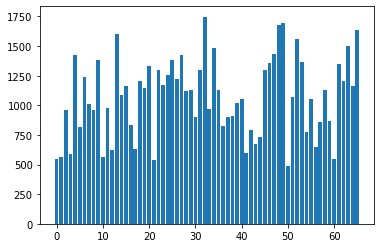

In [181]:
plt.bar(np.arange(a),t['text_len'])

# 2. Word Count distribution across corpus

<BarContainer object of 66 artists>

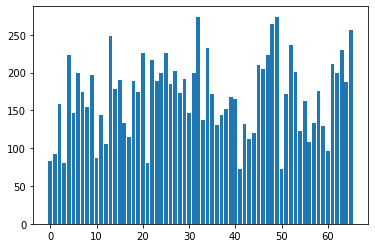

In [182]:
plt.bar(np.arange(a),t['word_count'])

# 3. The distribution of top unigrams before removing stop words


<BarContainer object of 30 artists>

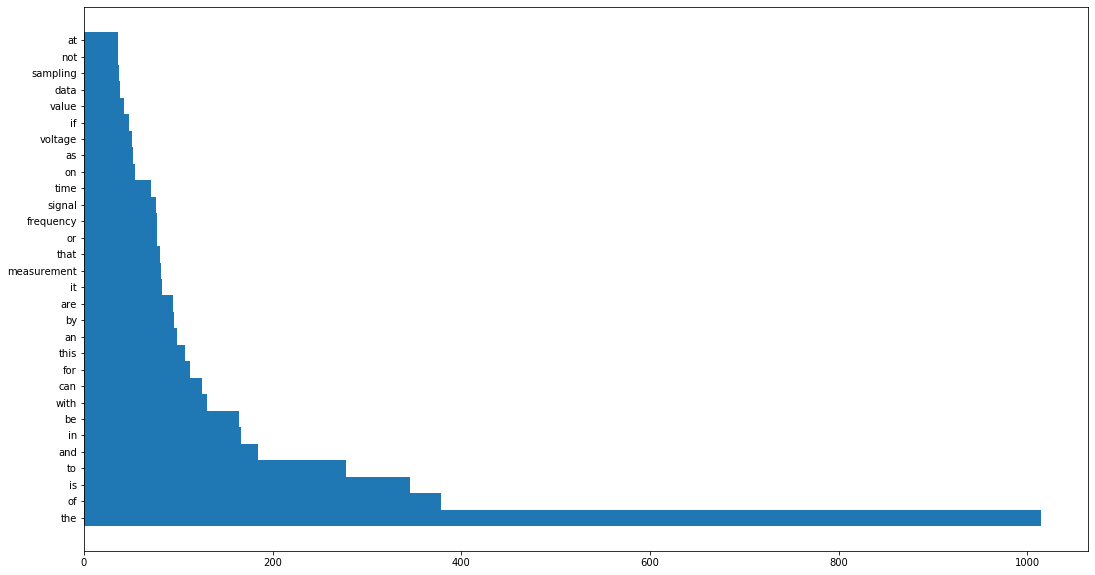

In [183]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(t['text'], 30)
df1 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
f, ax = plt.subplots(figsize=(18,10))
plt.barh(df1['Text'], df1['count'], height=1)

# 4. The distribution of top unigrams after removing stop words


<BarContainer object of 30 artists>

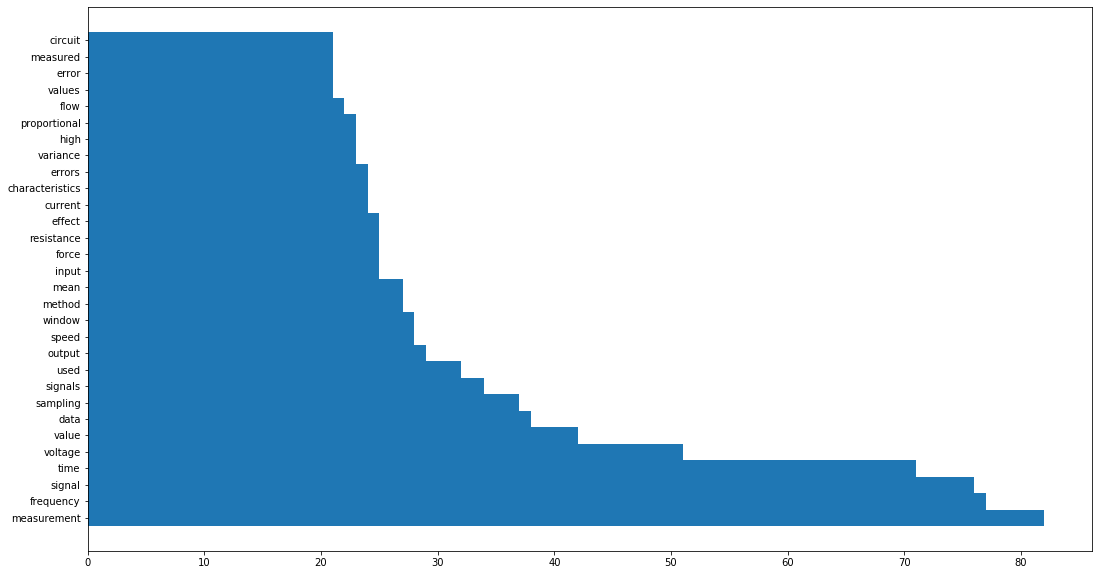

In [184]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(t['text'], 30)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
f, ax = plt.subplots(figsize=(18,10))
plt.barh(df2['Text'], df2['count'], height=1)

# 5. Distribution of top words among documents

In [185]:
split=[]
for ele in t['text']:
    ele = ele.split()
    split.append(ele)
count=[]
for i in range(len(df2)):
    summ=0
    for j in range(a):
        if df2.iloc[i,0] in split[j]:
            summ+=1
    count.append(summ)
df2['doc_count']=count
joinedlist=[]
for i in range(a):
    joinedlist+= split[i]
print(joinedlist[0])

Clustering


<BarContainer object of 30 artists>

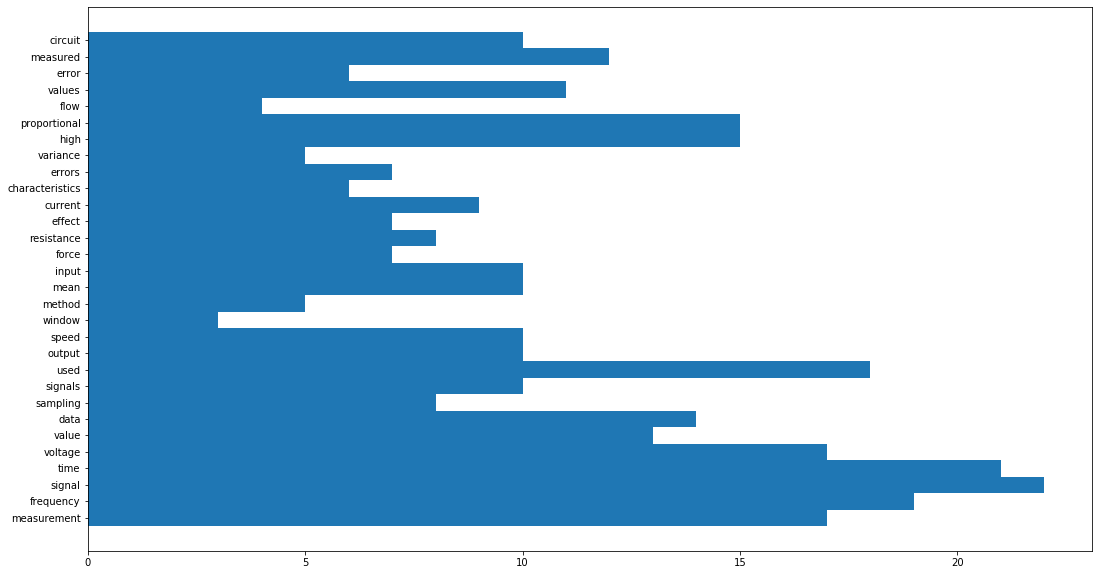

In [186]:
f, ax = plt.subplots(figsize=(18,10))
plt.barh(df2['Text'], df2['doc_count'], height=1)

**Conclusion**

* Majority topic is signal amd time.
* Followed by voltage and measurement.

# Data pre-processing

In [187]:
# Converting all words in lower case

for i in range(a):
    df.iloc[i,0]=df.iloc[i,0].lower()

In [188]:
# removing numbers from text data
for i in range(a):
    df.iloc[i,0] = re.sub(r'\d+', '', df.iloc[i,0])

In [189]:
# separating the words at spaces.

for i in range(a):
    df.iloc[i,0] = df.iloc[i,0].split()
print(type(df.iloc[2,0]))

<class 'list'>


In [191]:

    
# Removing punctuations

for i in range(a):
    table = str.maketrans('', '', string.punctuation)
    df.iloc[i,0] = [w.translate(table) for w in df.iloc[i,0]]
    
# word lemmatizer

lemmatizer = WordNetLemmatizer()
for i in range(a):
    df.iloc[i,0] = [lemmatizer.lemmatize(word) for word in df.iloc[i,0]]

In [192]:
# Removing stopwords from the data

stop_words = set(stopwords.words('english'))
for i in range(a):
    df.iloc[i,0]= [w for w in df.iloc[i,0] if not w in stop_words]


In [193]:
# Loading text as string in dataframe
# tqdm is for printing the status bar

df['text']=df['text'].apply(str)
from tqdm import tqdm
preprocessed_text = []
for sentance in tqdm(df['text'].values):
        preprocessed_text.append(sentance.strip())
new_items = [item for item in preprocessed_text if not item.isdigit()]       


100%|██████████████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<?, ?it/s]


# Creating Vector space of text using Tf-idf

In [194]:
# Creating vector space of text using Tf-idf

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),min_df=1,max_df=20,use_idf = True)
tf_idf_vect.fit(new_items)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:20])
print('='*50)

final_tf_idf = tf_idf_vect.transform(new_items)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['abrupt', 'abrupt change', 'absolute', 'absolute error', 'absolute reference', 'absolute relative', 'absolute value', 'absorption', 'absorption emission', 'ac', 'ac current', 'ac motorsgenerators', 'ac quantity', 'ac signal', 'ac voltage', 'accelerated', 'accelerated capacitor', 'accelerates', 'accelerates wheel', 'accelerating']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (66, 7023)
the number of unique words including both unigrams and bigrams  7023


In [195]:
# Printing sample vector describing a text
# This a sparse matrix

print(final_tf_idf[2])

  (0, 6688)	0.07105204181019664
  (0, 6685)	0.07105204181019664
  (0, 6684)	0.07105204181019664
  (0, 6680)	0.07105204181019664
  (0, 6678)	0.06013571100482052
  (0, 6676)	0.06466639764358442
  (0, 6674)	0.32250040102925
  (0, 6469)	0.07105204181019664
  (0, 6457)	0.04040602679291496
  (0, 6408)	0.07105204181019664
  (0, 6406)	0.05375006683820832
  (0, 6376)	0.07105204181019664
  (0, 6374)	0.06466639764358442
  (0, 6370)	0.07105204181019664
  (0, 6367)	0.05662143742548557
  (0, 6245)	0.07105204181019664
  (0, 6238)	0.037348276085801504
  (0, 6112)	0.07105204181019664
  (0, 6110)	0.07105204181019664
  (0, 6090)	0.07469655217160301
  (0, 6004)	0.07105204181019664
  (0, 6003)	0.06466639764358442
  (0, 5547)	0.07105204181019664
  (0, 5542)	0.05375006683820832
  (0, 5513)	0.07105204181019664
  :	:
  (0, 1439)	0.07105204181019664
  (0, 1438)	0.06466639764358442
  (0, 1433)	0.06466639764358442
  (0, 1426)	0.19659731226748628
  (0, 1301)	0.07105204181019664
  (0, 1299)	0.06466639764358442
  (0

# Calculating text similarities

In [196]:
# importing cosine similarity for measuring distance between text vectors

from sklearn.metrics.pairwise import cosine_similarity

# printing sample text similarity

print('TEXT1')
print(s.iloc[22,0])
print('*'*50)
print('TEXT2')
print(s.iloc[20,0])
print('*'*50)
print(cosine_similarity(final_tf_idf[22], final_tf_idf[20]))


TEXT1
Power Measurement. What happens if we measure an AC current with a moving coil mechanism instrument like a DC current.
The displayed deflection is proportional to the product between voltage and current The cos term is averaged out to , because we can assume a high frequency of AC
quantities compared to the bandwidth of the instrument . This gives the mean value of the apparent power pS(t) which is identical to the mean of the amplitude of the active power.
The reactive power can be measured by shifting the voltage by before feeding it to the instrument. The displayed value is proportional to the reactive power
Measuring the Apparent Power. One way to measure apparent power is to measure the RMS of voltage and current separately and subsequently multiply them.
An alternative is to let this multiplication happen in a moving coil mechanism instrument by
physical law. To do this, the instrument has to be fed with the rectified values of voltage and
current. The scale must then consi

# Creating knowledge graph with textual nodes

In [197]:
# defining nodes and edges of the graph

node_i=[]
node_j=[]
edge=[]
for i in range (a):
    for j in range (a):
        cos_sim=cosine_similarity(final_tf_idf[i], final_tf_idf[j])
        if cos_sim>(.1) and i!=j:
            node_i.append(i)
            node_j.append(j)
            edge.append(float(cos_sim))
kg_nodes=list(zip(node_i,node_j,edge))
print(kg_nodes)

[(0, 1, 0.11111856490320554), (1, 0, 0.11111856490320554), (1, 5, 0.19664933810144952), (1, 6, 0.19657523714322175), (2, 3, 0.10525327696560331), (2, 4, 0.17604083859473976), (2, 7, 0.35430722184226604), (2, 49, 0.16086689420506584), (3, 2, 0.10525327696560331), (4, 2, 0.17604083859473976), (4, 7, 0.16353363850139807), (5, 1, 0.19664933810144952), (5, 6, 0.23401157985117982), (6, 1, 0.19657523714322175), (6, 5, 0.23401157985117982), (7, 2, 0.35430722184226604), (7, 4, 0.16353363850139807), (7, 49, 0.11856970898964476), (12, 56, 0.14660548944807306), (13, 15, 0.12104377324028766), (13, 25, 0.10919151319211856), (13, 26, 0.17856060495521242), (13, 38, 0.10307441406075796), (14, 22, 0.22787150950844715), (15, 13, 0.12104377324028766), (15, 18, 0.19154498661661784), (15, 37, 0.1930276154619333), (15, 38, 0.15906104337549654), (16, 18, 0.11138062583638891), (17, 29, 0.12500702743974137), (17, 31, 0.2189237720105258), (18, 15, 0.19154498661661784), (18, 16, 0.11138062583638891), (20, 22, 0.2

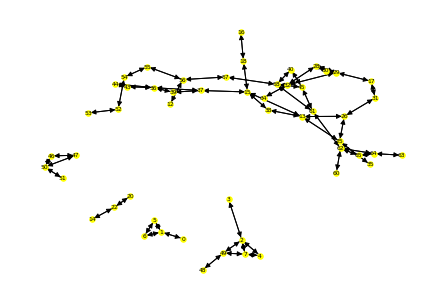

In [198]:
# loading networkx for plotting graph. 
# assigning graph parameters

import networkx as nx
import matplotlib.pyplot as plt
DG=nx.DiGraph()
DG.add_weighted_edges_from(kg_nodes)
nx.draw(DG,node_size=30, arrows=True,node_color='yellow', font_size=6, with_labels=True)
plt.savefig("Graph_2.png",dpi=1000, format="PNG")
plt.show()

In [199]:
# finding different communities withing graph
# better visualisation of topic distribution

from networkx.algorithms import community
import itertools
k = 2
comp = community.girvan_newman(DG)
cluster=[]
for communities in itertools.islice(comp, k):
    cluster.append(list(sorted(c) for c in communities))
print(cluster[1])
cluster_lst=[]
for i in range(len(cluster[1])):
    cluster_lst.append(cluster[1][i])
print(cluster_lst[7])

[[0, 1, 5, 6], [2, 3, 4, 7, 48, 49], [12, 52, 53, 54, 55, 56, 57], [13, 15, 16, 18, 25, 26, 35, 36, 37, 38, 39, 43, 44], [14, 20, 22], [17, 28, 29, 30, 31, 32, 34], [40, 45, 58, 60, 61, 62, 63, 64, 65], [46, 47, 50, 51]]
[46, 47, 50, 51]


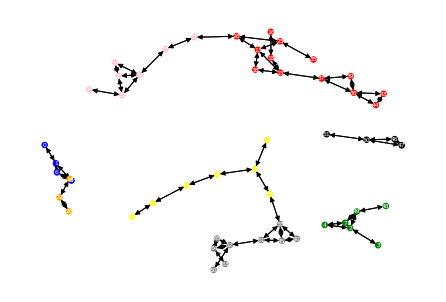

In [200]:
# different colormaps for different group of nodes having same communities

color_map = []
for node in DG:
    if node in cluster_lst[0]:
        color_map.append('blue')
    elif node in cluster_lst[1]: 
        color_map.append('green')  
    elif node in cluster_lst[2]: 
        color_map.append('yellow')
    elif node in cluster_lst[3]: 
        color_map.append('red')
    elif node in cluster_lst[4]: 
        color_map.append('orange')
    elif node in cluster_lst[5]: 
        color_map.append('pink')
    elif node in cluster_lst[6]:
        color_map.append('grey')
    else:
        color_map.append('black')
nx.draw(DG, node_size= 30, font_size=6,font_color='white',node_color=color_map, with_labels=True)
plt.savefig("Graph_2.png",dpi=1000, format="PNG")
plt.show()

# Image Data

In [28]:
# loading textual description of images in pandas

my_dir_path = r"C:\Users\Lenovo\Desktop\final_images"
results = defaultdict(list)
name=[]
for file in Path(my_dir_path).iterdir():
    with open(file, encoding="utf8") as file_open:
        results["text"].append(file_open.read())
for file in Path(my_dir_path).iterdir():
        name.append(file.name)
df_image_1 = pd.DataFrame(results)
t=df_image_1.copy(deep=True)
print(df_image_1)

                                                 text
0   Measurement of Acceleration with a Seismic Mas...
1   Sampling of a Continuous-Time Signal.\nEverybo...
2   Balance the Bridge.\nThis bridge circuit was i...
3   Basics of Clustering.\nLike PCA Clustering ope...
4   Confidence Interval for Normal Distributions.\...
5   Coriolis based Measurement.\nA body that rotat...
6   Differentiator.\nAt the OpAmp circuit it is ob...
7   Analog/Digital and Digital/Analog Conversion.\...
8   Aliasing With Down Sampling\nDuring sampling o...
9   D/A Converter R-2R Principle.\nThe R-2R conver...
10  D/A Converter Current Weighted Principle.\nIn ...
11  Energy Measurement.\nBecause only active power...
12  Float Measurement.\nA floating body with large...
13  Fourier Transform.\nExtension of the Fourier s...
14  Normal Distribution Gaussian\nA normal distrib...
15  Histograms.\nIf we measure the same quantity N...
16  Hot Wire Measurement.\nA hot wire or a hot foi...
17  Integrator.\nAn integrat

<class 'list'>


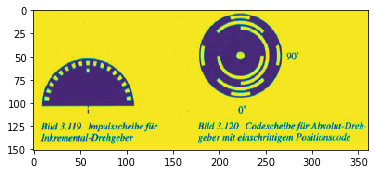

In [30]:
# loading images from directory

import cv2
import numpy
import glob
import pylab as plt

folders = glob.glob(r'C:\Users\Lenovo\Desktop\images_1')
imagenames_list = []
for folder in folders:
    for f in glob.glob(folder+'/*.PNG'):
        imagenames_list.append(f)

read_images = []        

for image in imagenames_list:
    read_images.append(cv2.imread(image, cv2.IMREAD_GRAYSCALE))
plt.imshow(read_images[34])
print(type(read_images))

# Image Captioning

In [32]:
# using gensim module for extracting keywords to deescribe image

from gensim.summarization import keywords
d=[0 for i in range(len(df_image_1))]
for i in range(len(df_image_1)):
     d[i]=keywords(df_image_1.iloc[i,0],words=8,lemmatize=True)


measurement
temperature
effects
method
like
gauges
applying multiple


()

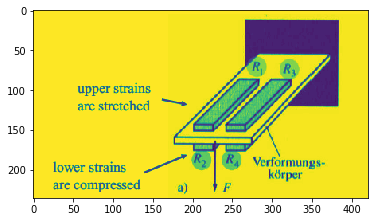

In [36]:
def display_caption(number):
    print(d[number])
    plt.imshow(read_images[number])
    return()
display_caption(36)


# Creating vector space  for image description

In [37]:
# combining two dataframes having text and image captions

caption = pd.DataFrame(d,columns =['text']) 
dff=s.append(caption,ignore_index = True)
leng = len(dff)

In [38]:
# data pre-processing for text and image captions

for i in range(leng):
    dff.iloc[i,0]=dff.iloc[i,0].lower()
for i in range(leng):
    dff.iloc[i,0] = re.sub(r'\d+', '', dff.iloc[i,0])
for i in range(leng):
    dff.iloc[i,0] = dff.iloc[i,0].split()
    
# Removing punctuations

for i in range(leng):
    table = str.maketrans('', '', string.punctuation)
    dff.iloc[i,0] = [w.translate(table) for w in dff.iloc[i,0]]
    
# word lemmatizer

lemmatizer = WordNetLemmatizer()
for i in range(leng):
    dff.iloc[i,0] = [lemmatizer.lemmatize(word) for word in dff.iloc[i,0]]
stop_words = set(stopwords.words('english'))
for i in range(leng):
    dff.iloc[i,0]= [w for w in dff.iloc[i,0] if not w in stop_words]


In [39]:
dff['text']=dff['text'].apply(str)
from tqdm import tqdm
preprocessed_text_1 = []
# tqdm is for printing the status bar
for sentance in tqdm(dff['text'].values):
        preprocessed_text_1.append(sentance.strip())

100%|████████████████████████████████████████████████████████████████████████████| 107/107 [00:00<00:00, 107340.48it/s]


In [40]:
new_items_2= [item for item in preprocessed_text_1 if not item.isdigit()]

In [41]:
tf_idf_vect_1 = TfidfVectorizer(ngram_range=(1,0),use_idf = True)
tf_idf_vect_1.fit(new_items_2)
print("some sample features(unique words in the corpus)",tf_idf_vect_1.get_feature_names()[0:20])
print('='*50)

final_tf_idf_1 = tf_idf_vect_1.transform(new_items_2)
print("the type of count vectorizer ",type(final_tf_idf_1))
print("the shape of out text TFIDF vectorizer ",final_tf_idf_1.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf_1.get_shape()[1])

some sample features(unique words in the corpus) ['abrupt', 'absolute', 'absorption', 'ac', 'accelerated', 'accelerates', 'accelerating', 'acceleration', 'accepted', 'according', 'accordingly', 'account', 'accumulation', 'accuracy', 'accurate', 'accurately', 'achieve', 'achieved', 'acoustic', 'across']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (107, 1647)
the number of unique words including both unigrams and bigrams  1647


In [42]:
# using captions of image to find similarities between text and image

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(final_tf_idf_1[71], final_tf_idf_1[30]))
print(dff.iloc[71,0])
print(dff.iloc[30,0])

[[0.34399388]]
['force', 'lag', 'type', 'coriolis', 'based', 'speed', 'orthogonal', 'flow']
['coriolisbased', 'measurement', 'body', 'rotates', 'angular', 'velocity', 'move', 'speed', 'orthogonal', 'axis', 'rotation', 'experience', 'coriolis', 'force', 'orthogonal', 'axis', 'speed', 'direction', 'force', 'bend', 'upipe', 'angle', 'sintype', 'excitation', 'phase', 'lag', 'exists', 'point', 'phase', 'lag', 'proportional', 'mass', 'flow', 'hot', 'wire', 'measurement', 'hot', 'wire', 'hot', 'foil', 'heated', 'electric', 'current', 'via', 'constant', 'voltage', 'current', 'source', 'flow', 'flow', 'around', 'wire', 'foil', 'decrease', 'temperature', 'temperature', 'drop', 'cause', 'change', 'electric', 'resistance', 'measured', 'mass', 'flow', 'directly', 'measured', 'cooling', 'proportional', 'temperature', 'difference', 'wirefoil', 'fluid', 'proportional', 'number', 'molecule', 'impact', 'correction', 'respect', 'density', 'pressure', 'change', 'superfluous']


In [43]:
# reassigning nodes of graph to accomodate image data as well

node_a=[]
node_b=[]
edges=[]
for i in range (66,107):
    for j in range (0,66):
        g=cosine_similarity(final_tf_idf_1[i], final_tf_idf_1[j])
        if g>(.20) and i!=j:
            node_a.append(i)
            node_b.append(j)
            edges.append(float(g))
finalrel=list(zip(node_a,node_b,))
print(finalrel)


[(66, 19), (66, 23), (67, 40), (67, 45), (68, 13), (68, 15), (69, 1), (69, 5), (69, 6), (70, 47), (70, 48), (71, 29), (71, 30), (71, 35), (72, 16), (72, 18), (73, 41), (73, 58), (74, 40), (74, 45), (74, 58), (74, 61), (75, 38), (76, 15), (76, 38), (77, 14), (78, 29), (79, 42), (79, 59), (79, 63), (80, 48), (81, 46), (81, 47), (81, 48), (82, 26), (82, 30), (83, 16), (83, 23), (84, 13), (84, 15), (84, 28), (84, 29), (84, 30), (84, 38), (85, 16), (86, 29), (87, 17), (87, 29), (87, 30), (87, 31), (88, 15), (89, 16), (89, 18), (90, 19), (91, 36), (91, 43), (91, 44), (92, 21), (93, 31), (94, 28), (95, 39), (96, 37), (97, 34), (98, 25), (98, 35), (99, 35), (100, 34), (101, 34), (102, 26), (104, 56), (104, 57), (104, 58), (105, 28), (106, 62), (106, 65)]


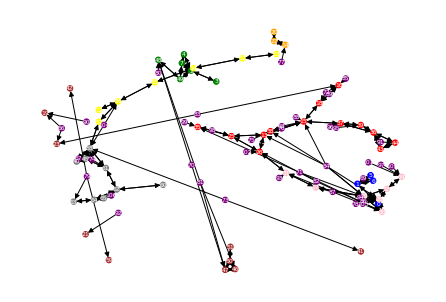

In [44]:
# visualising relations between text and images

DG.add_edges_from(finalrel)
color_map = []
for node in DG:
    if node in cluster_lst[0]:
        color_map.append('blue')
    elif node in cluster_lst[1]: 
        color_map.append('green')  
    elif node in cluster_lst[2]: 
        color_map.append('yellow')
    elif node in cluster_lst[3]: 
        color_map.append('red')
    elif node in cluster_lst[4]: 
        color_map.append('orange')
    elif node in cluster_lst[5]: 
        color_map.append('pink')
    elif node in cluster_lst[6]:
        color_map.append('grey')
    elif node>65:
        color_map.append('purple')
    else:
        color_map.append('brown')
nx.draw(DG, node_size= 30, font_size=6,font_color='white',node_color=color_map, with_labels=True)
plt.savefig("Graph_3.png",dpi=1000, format="PNG")
plt.show()

# Clustering to cross verify relations obtained in KG

In [202]:
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(new_items)

true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
print(X)

  (0, 106)	0.15534030121653206
  (0, 654)	0.12379082881930212
  (0, 900)	0.08596371033945215
  (0, 1545)	0.1413794372774921
  (0, 1470)	0.08374153759410183
  (0, 661)	0.1413794372774921
  (0, 693)	0.10355231879764215
  (0, 181)	0.09364692819587199
  (0, 213)	0.15534030121653206
  (0, 102)	0.13147404667572196
  (0, 1189)	0.1413794372774921
  (0, 445)	0.1076077921349119
  (0, 191)	0.10355231879764215
  (0, 696)	0.11751318273668207
  (0, 1537)	0.1413794372774921
  (0, 1057)	0.1413794372774921
  (0, 1450)	0.1076077921349119
  (0, 477)	0.12379082881930212
  (0, 664)	0.07437839012126933
  (0, 222)	0.12379082881930212
  (0, 677)	0.1076077921349119
  (0, 598)	0.08596371033945215
  (0, 223)	0.15534030121653206
  (0, 216)	0.3106806024330641
  (0, 1426)	0.13147404667572196
  :	:
  (65, 92)	0.07481429327623189
  (65, 531)	0.03122007483327029
  (65, 1551)	0.025356372917397004
  (65, 808)	0.03917662255040953
  (65, 1022)	0.034522340500684555
  (65, 1224)	0.033312920634536246
  (65, 816)	0.0438309046

In [203]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [204]:
print(order_centroids[0].shape)

(1635,)


# Clusters obtained by clustering

In [205]:
for i in range(true_k):
    print(i)
    for ind in order_centroids[i, :10]:
        print(terms[ind])

0
impulse
unit
system
time
response
step
energy
power
output
digital
1
measurement
force
speed
used
wave
doppler
displacement
effect
camera
accepted
2
frequency
signal
sampling
aliasing
oscillation
time
theorem
value
periodic
range
3
coil
characteristic
measurement
force
plate
displacement
inductivity
method
quantity
field
4
error
quantization
value
ad
interval
measurement
random
noise
converter
one
5
data
cluster
variance
clustering
axis
new
pca
estimation
kmeans
preprocessing
6
voltage
input
current
circuit
flow
resistance
opamp
resistor
drop
learning
7
window
dft
signal
rectangular
transform
sensor
time
fourier
length
frequency


In [206]:
predicted=(model.predict(X))
predict=pd.DataFrame(predicted)
print((predicted))


[5 5 5 5 5 5 5 5 6 3 1 1 0 6 0 6 6 3 6 3 2 6 6 2 3 3 3 1 6 3 6 1 1 7 1 3 4
 6 6 4 2 0 2 4 4 2 4 4 4 5 4 6 3 3 0 0 0 0 2 2 7 2 7 7 7 7]


# Observing clusters obtained by Clustering and Knowledge Graph

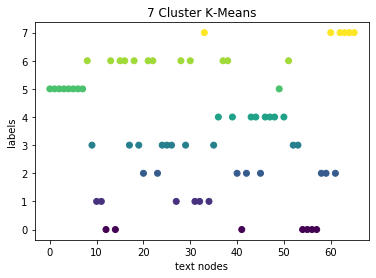

In [207]:
#kmeans=KMeans(n_clusters=7)
#kmeansoutput=kmeans.fit(X)
#print(kmeansoutput.labels_)
import pylab as pl
intt=list(range(0, 66))

pl.figure('3 Cluster K-Means')
pl.scatter(intt, predicted, c=predicted)
pl.xlabel('text nodes')
pl.ylabel('labels')
pl.title('7 Cluster K-Means')
pl.show()

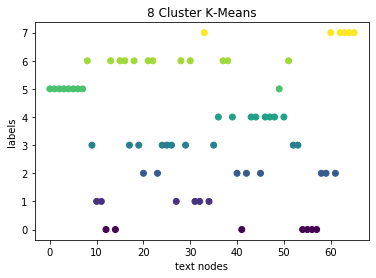

In [208]:
import pylab as pl
intt=list(range(0, 66))

pl.figure('3 Cluster K-Means')
pl.scatter(intt, predicted, c=predicted)
pl.xlabel('text nodes')
pl.ylabel('labels')
pl.title('8 Cluster K-Means')
pl.show()


In [209]:
lstt=[]
for i in range(7):
    clusterd=[]
    for j in range(66):
        if predicted[j]==i:
            clusterd.append(j)
    lstt.append(clusterd)
print(lstt)

[[12, 14, 41, 54, 55, 56, 57], [10, 11, 27, 31, 32, 34], [20, 23, 40, 42, 45, 58, 59, 61], [9, 17, 19, 24, 25, 26, 29, 35, 52, 53], [36, 39, 43, 44, 46, 47, 48, 50], [0, 1, 2, 3, 4, 5, 6, 7, 49], [8, 13, 15, 16, 18, 21, 22, 28, 30, 37, 38, 51]]


In [210]:
print(cluster_lst)

[[0, 1, 5, 6], [2, 3, 4, 7, 48, 49], [12, 52, 53, 54, 55, 56, 57], [13, 15, 16, 18, 25, 26, 35, 36, 37, 38, 39, 43, 44], [14, 20, 22], [17, 28, 29, 30, 31, 32, 34], [40, 45, 58, 60, 61, 62, 63, 64, 65], [46, 47, 50, 51]]
